In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carregamento da base de dados
# Cada registro representa o nível de poluição em cada hora (medida de hora em hora)
# A ideia é prever o nível de poluição em uma determinada hora baseado nas horas anteriores
base = pd.read_csv('poluicao.csv')

# Exclusão dos registros com valores não preenchidos (valores ausentes)
base = base.dropna()

# Exclusão de atributos que não serão utilizados para a análise
# "No" é o número do registro
# "Year", "month", "day" e "hour" são as informações temporais que não são utilizadas para análise
# "Cbwd" é um atributo de texto que não está relacionado com as previsões
base = base.drop('No', axis = 1)
base = base.drop('year', axis = 1)
base = base.drop('month', axis = 1)
base = base.drop('day', axis = 1)
base = base.drop('hour', axis = 1)
base = base.drop('cbwd', axis = 1)

# Os atributos previsores são todos menos o índice 0
base_treinamento = base.iloc[:, 1:7].values

# Busca dos valores que será feita a previsão, ou seja o primeiro atributo pm2.5
poluicao = base.iloc[:, 0].values

# Aplicação da normalização
normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
# Necessário mudar o formato da variável para pode aplicar a normalização
poluicao = poluicao.reshape(-1, 1)
poluicao_normalizado = normalizador.fit_transform(poluicao)

# Criação da estrutura de dados que representa a série temporal, considerando 
# 10 horas anteriores para prever a hora atual
previsores = []
poluicao_real = []
for i in range(10, 41757):
    previsores.append(base_treinamento_normalizada[i-10:i, 0:6])
    poluicao_real.append(poluicao_normalizado[i, 0])
previsores, poluicao_real = np.array(previsores), np.array(poluicao_real)

# Criação da estrutura da rede neural. O último parâmetro com o valor 6 representa
# a quantidade de atributos previsores
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', 
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, poluicao_real, epochs = 100, batch_size = 64)

# Neste exemplo não utilizaremos uma base de dados específica para teste, ou seja, 
# faremos as previsões diretamente na base de dados de treinamento
previsoes = regressor.predict(previsores)
previsoes = normalizador.inverse_transform(previsoes)




C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

Epoch 1/100
653/653 [==============================] - 21s 32ms/step - loss: 0.0073 - mean_absolute_error: 0.0618
Epoch 2/100
653/653 [==============================] - 20s 31ms/step - loss: 0.0061 - mean_absolute_error: 0.0555
Epoch 3/100
653/653 [==============================] - 20s 31ms/step - loss: 0.0057 - mean_absolute_error: 0.0531
Epoch 4/100
653/653 [==============================] - 20s 30ms/step - loss: 0.0055 - mean_absolute_error: 0.0522
Epoch 5/100
653/653 [==============================] - 19s 30ms/step - loss: 0.0054 - mean_absolute_error: 0.0515
Epoch 6/100
653/653 [==============================] - 20s 30ms/step - loss: 0.0053 - mean_absolute_error: 0.0509
Epoch 7/100
653/653 [==============================] - 19s 29ms/step - loss: 0.0052 - mean_absolute_error: 0.0506
Epoch 8/100
653/653 [==============================] - 15s 23ms/step - loss: 0.0052 - mean_absolute_error: 0.0502
Epoch 9/100
653/653 [==============================] - 15s 23ms/step - loss: 0.0051 - me

653/653 [==============================] - 20s 30ms/step - loss: 0.0034 - mean_absolute_error: 0.0401
Epoch 71/100
653/653 [==============================] - 20s 30ms/step - loss: 0.0034 - mean_absolute_error: 0.0401
Epoch 72/100
653/653 [==============================] - 20s 30ms/step - loss: 0.0033 - mean_absolute_error: 0.0398
Epoch 73/100
653/653 [==============================] - 17s 26ms/step - loss: 0.0033 - mean_absolute_error: 0.0397
Epoch 74/100
653/653 [==============================] - 17s 26ms/step - loss: 0.0033 - mean_absolute_error: 0.0396
Epoch 75/100
653/653 [==============================] - 20s 30ms/step - loss: 0.0033 - mean_absolute_error: 0.0396
Epoch 76/100
653/653 [==============================] - 21s 32ms/step - loss: 0.0032 - mean_absolute_error: 0.0393 1s - loss: 0.0032 
Epoch 77/100
653/653 [==============================] - 22s 33ms/step - loss: 0.0032 - mean_absolute_error: 0.0393
Epoch 78/100
653/653 [==============================] - 21s 33ms/step - lo

<Figure size 640x480 with 1 Axes>

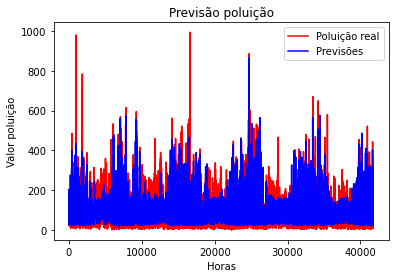

In [2]:
# Verificação da média nos resultados das previsões e nos resultados reais
previsoes.mean()
poluicao.mean()

# Geração do gráfico. Será gerado um gráfico de barras porque temos muitos registros
plt.plot(poluicao, color = 'red', label = 'Poluição real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão poluição')
plt.xlabel('Horas')
plt.ylabel('Valor poluição')
plt.legend()
plt.show()